In [11]:
file = '../data/random_sim/results/general_data.csv'
import numpy as np
import matplotlib.pyplot as plt
import skimage as ski
import pandas as pd
df = pd.read_csv(file)

In [12]:
df.columns

Index(['Unnamed: 0', 'id', 'success', 'conc_max', 'min_distance', 't_sim',
       'reverse_jaccard', 'ctm_x', 'ctm_y', 'com_distance', 'var',
       'jaccard_sim', 'wass', 'NWD', 'similarity', 'Spearman', 'Pearson',
       'sum_mass', 'sum_dist', 'class_0_mf', 'class_0_ig', 'class_0_jaccard',
       'class_1_mf', 'class_1_ig', 'class_1_jaccard', 'class_2_mf',
       'class_2_ig', 'class_2_jaccard', 'class_3_mf', 'class_3_ig',
       'class_3_jaccard'],
      dtype='object')

Text(0, 0.5, 'Simulations per bin')

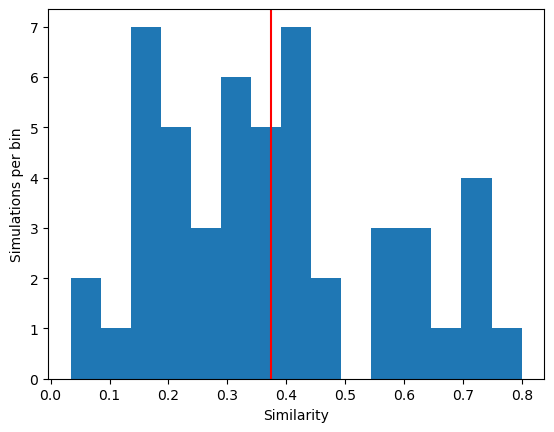

In [4]:
fig, ax = plt.subplots()
ax.hist(df['similarity'],15)
ax.vlines([df['similarity'].mean()],ymin = 0, ymax = 1, color = 'red', linestyle = '-', 
        transform=ax.get_xaxis_transform())
ax.set_xlabel('Similarity')
ax.set_ylabel('Simulations per bin')
# fig.tight_layout()


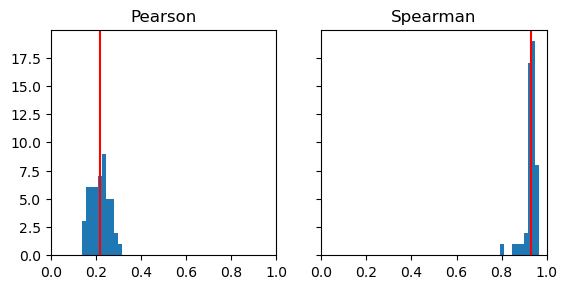

In [5]:
distances = ['Pearson','Spearman']
fig, axs = plt.subplots(1,2, sharey= True)

axs = axs.flatten()
for i, distance in enumerate(distances):

    axs[i].set_xlim(0,1)
    axs[i].vlines(np.mean(df[distance]),ymin = 0, ymax = 1, color = 'red', linestyle = '-', 
        transform=axs[i].get_xaxis_transform())
    axs[i].hist(df[distance], 10)
    axs[i].set_title(distance)
    axs[i].set_box_aspect(1)
# fig.tight_layout()

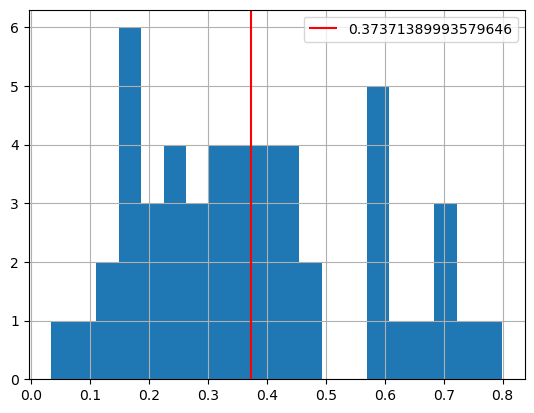

In [7]:
fig,ax= plt.subplots()
df['similarity'].hist(bins = 20,ax = ax)
ax.vlines(np.mean(df['similarity']),ymin = 0, ymax = 1, color = 'red', linestyle = '-', transform=ax.get_xaxis_transform(),
          label =f'{np.mean(df["similarity"])}')
ax.legend()

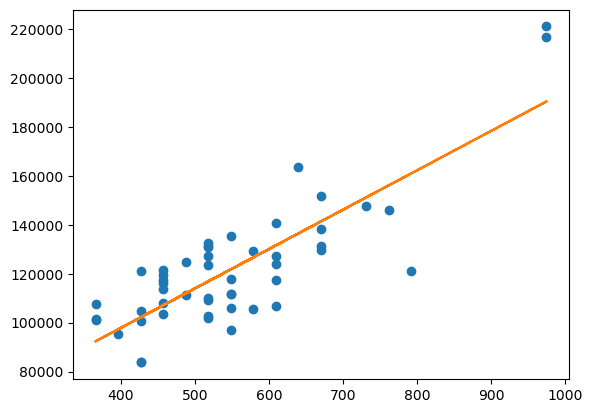

In [20]:
from scipy import stats
slope, intercept, r, p, std_err = stats.linregress(df['t_sim'], df['min_distance'])
plt.scatter(df['t_sim'], df['min_distance'])
plt.plot(df['t_sim'], intercept + slope * df['t_sim'], c = 'C1')